In [22]:
import face_recognition
import os
import sys
import random
import math
import numpy as np
import skimage
import skimage.io
import skimage.filters
import skimage.color
import skimage.exposure
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw



real62.jpg


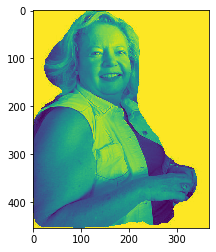

In [29]:
IMAGE_DIR = '/mnt/d/projects/cs230/presentation_set/body/'
TARGET_DIR = '/mnt/d/projects/cs230/presentation_set/face/'
#IMAGE_DIR = '/mnt/d/projects/cs230/disney_images/'
file_names = next(os.walk(IMAGE_DIR))[2]
imagefile = np.random.choice(file_names, 1, replace = False)[0]
print(imagefile)
image = skimage.color.rgb2gray(skimage.io.imread(IMAGE_DIR + imagefile))
plt.imshow(image)

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 241, Left: 170, Bottom: 562, Right: 491


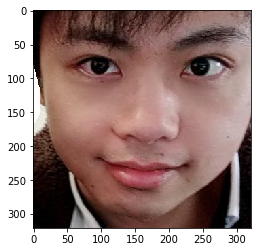

In [12]:
image = face_recognition.load_image_file(IMAGE_DIR + 'real7.jpg')
face_locations = face_recognition.face_locations(image)
face_landmarks_list = face_recognition.face_landmarks(image)

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    
    plt.imshow(pil_image)

Processing file 0/112


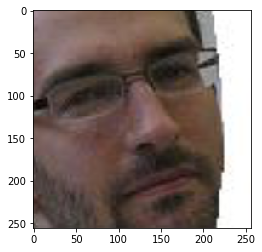

In [30]:
file_names_shuffled = np.random.choice(file_names, len(file_names), replace = False)
file_names_shuffled = file_names
count = len(next(os.walk(TARGET_DIR))[2]) + 1

for i, fn in enumerate(file_names_shuffled):

    if i % 250 == 0: print(f"Processing file {i}/{len(file_names)}")
    image = face_recognition.load_image_file(IMAGE_DIR + fn)
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) == 0: 
        continue
    
    for face_location in face_locations:
        top, right, bottom, left = face_location
        face_image = image[top:bottom, left:right]
        #print(face_image)
        face_image = np.round(skimage.transform.resize(face_image, (256,256)) * 255).astype(np.uint8)
        #print(face_image)
        pil_image = Image.fromarray(face_image)
        pil_image.save(TARGET_DIR + str(count) + '.jpg')
        count += 1
    plt.imshow(pil_image)

In [198]:
file_names_shuffled
np.random.choice(file_names, len(file_names), replace = False)

array(['real24712.jpg', 'real12334.jpg', 'real17845.jpg', ...,
       'real16624.jpg', 'real20735.jpg', 'real9586.jpg'], dtype='<U13')